In [1]:
# This sets up the graphing configuration
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = "DejaVu Sans"
graph.rcParams["font.size"] = "12"
graph.rcParams['image.cmap'] = 'rainbow'
graph.rcParams['axes.facecolor'] = 'white'
graph.rcParams['figure.facecolor'] = 'white'
import numpy as np
import pandas as pd

dataset = pd.read_csv('Data/traffic_by_hour.csv')

print(dataset.head())

          00         01         02         03         04        05         06  \
0  43.606554  24.714152   9.302911   3.694417   9.324995  9.837653   7.960157   
1  44.584835  19.604348   9.480832  13.476905  14.465224  6.014083  22.679671   
2  33.208561  29.584181  27.207633  11.243233  12.229805  5.072605   6.111838   
3  35.026655  20.367550  21.445285   7.449592   2.232115  8.104623   9.095805   
4  40.163194  19.936328  18.066480  12.109940  10.878539  9.766027  19.504761   

          07         08         09  ...         14         15         16  \
0  21.292098  27.714126  46.709211  ...  41.714860  38.130357  42.779751   
1  18.192898  28.783762  40.113972  ...  51.364457  35.819379  53.243056   
2  26.176792  35.246483  38.220432  ...  37.738029  42.104013  54.642667   
3  19.499463  37.689567  33.907093  ...  32.354274  36.112366  53.821508   
4  10.313875  28.509128  30.809746  ...  37.509431  54.416484  36.801343   

          17         18         19         20         21

### Transponer la tabla

In [2]:
dataset_T = np.transpose(dataset)

print(dataset_T)

            0          1          2          3          4          5
00  43.606554  44.584835  33.208561  35.026655  40.163194  49.169391
01  24.714152  19.604348  29.584181  20.367550  19.936328  24.455188
02   9.302911   9.480832  27.207633  21.445285  18.066480  12.391360
03   3.694417  13.476905  11.243233   7.449592  12.109940  10.705337
04   9.324995  14.465224  12.229805   2.232115  10.878539   6.511395
05   9.837653   6.014083   5.072605   8.104623   9.766027  21.785345
06   7.960157  22.679671   6.111838   9.095805  19.504761  19.257321
07  21.292098  18.192898  26.176792  19.499463  10.313875  23.273782
08  27.714126  28.783762  35.246483  37.689567  28.509128  29.661006
09  46.709211  40.113972  38.220432  33.907093  30.809746  34.608582
10  39.111999  46.149334  30.902951  31.018349  36.326509  38.679585
11  47.428745  43.753611  50.462422  43.379814  45.893941  48.254502
12  43.459394  45.312618  41.865849  40.330625  31.512743  44.585404
13  39.046579  34.654569  43.62873

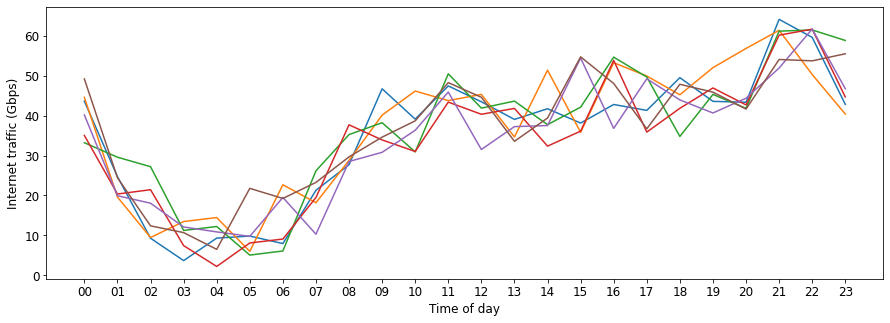

In [3]:
# Let's visualise the data!

for sample in range(0, dataset_T.shape[1]):
    graph.plot(dataset.columns.values, dataset_T[sample])
###

graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()

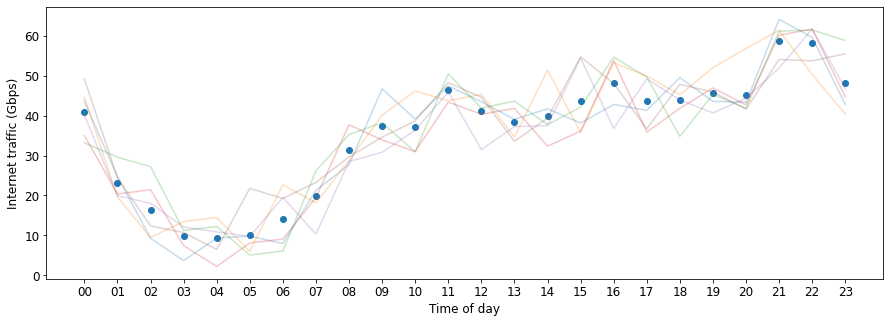

In [4]:
# We want to look at the mean values for each hour.

hours = dataset.columns.values

train_Y = [dataset[hour].mean() for hour in hours]  # This will be our outcome we measure (label) - amount of internet traffic
train_X = np.transpose([int(hour) for hour in hours]) # This is our feature - time of day
###

# This makes our graph, don't edit!
graph.scatter(train_X, train_Y)
for sample in range(0,dataset_T.shape[1]):
    graph.plot(hours, dataset_T[sample], alpha=0.25)
graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()

In [5]:

# Polynomials of degree 1 are linear!
# Lets include this one just for comparison

poly_1 = np.polyfit(train_X, train_Y, 1)
###


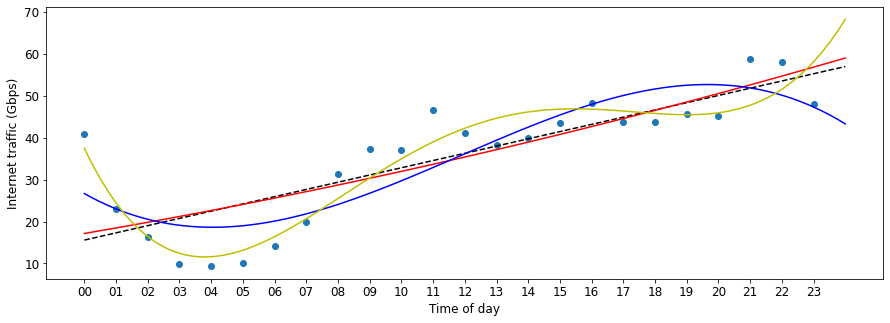

In [6]:
poly_2 = np.polyfit(train_X, train_Y, 2)
poly_3 = np.polyfit(train_X, train_Y, 3)
poly_4 = np.polyfit(train_X, train_Y, 4)
###

# Let's plot it!
graph.scatter(train_X, train_Y)
xp = np.linspace(0, 24, 100)

# black dashed linear degree 1
graph.plot(xp, np.polyval(poly_1, xp), 'k--')
# red degree 2
graph.plot(xp, np.polyval(poly_2, xp), 'r-')
# blue degree 3
graph.plot(xp, np.polyval(poly_3, xp), 'b-') 
# yellow degree 4
graph.plot(xp, np.polyval(poly_4, xp), 'y-') 

graph.xticks(train_X, dataset.columns.values)
graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()

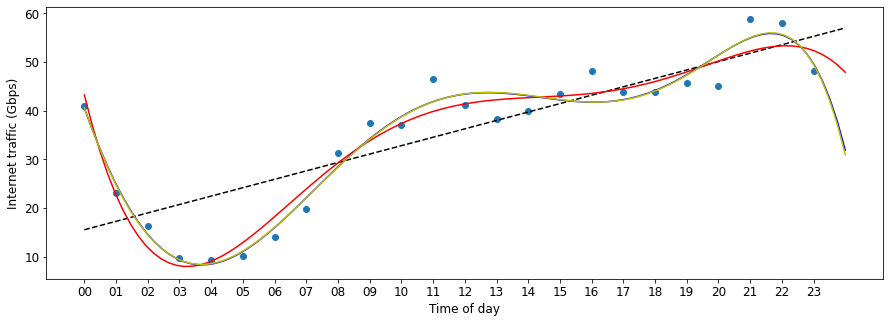

In [7]:
poly_5 = np.polyfit(train_X, train_Y, 5)
poly_6 = np.polyfit(train_X, train_Y, 6)
poly_7 = np.polyfit(train_X, train_Y,>)
###

# Let's plot it!
graph.scatter(train_X, train_Y)
xp = np.linspace(0, 24, 100)

# black dashed linear degree 1
graph.plot(xp, np.polyval(poly_1, xp), 'k--')
# red degree 5
graph.plot(xp, np.polyval(poly_5, xp), 'r-') 
# blue degree 6
graph.plot(xp, np.polyval(poly_6, xp), 'b-') 
# yellow degree 7
graph.plot(xp, np.polyval(poly_7, xp), 'y-') 

graph.xticks(train_X, dataset.columns.values)
graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()

### Regresión polinómica de grado 6

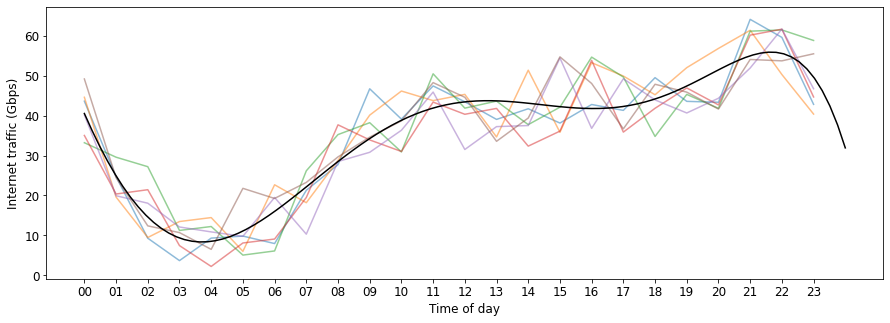

In [8]:
for row in range(0,dataset_T.shape[1]):
    graph.plot(dataset.columns.values, dataset_T[row], alpha = 0.5)

graph.plot(xp, np.polyval(poly_6, xp), 'k-')
###

graph.xlabel('Time of day')
graph.ylabel('Internet traffic (Gbps)')
graph.show()


### Usando este modelo para hacer una predicción para un tiempo entre 00 y 24 

at t=12.5, predicted internet traffic is 43.70388389311783 Gbps


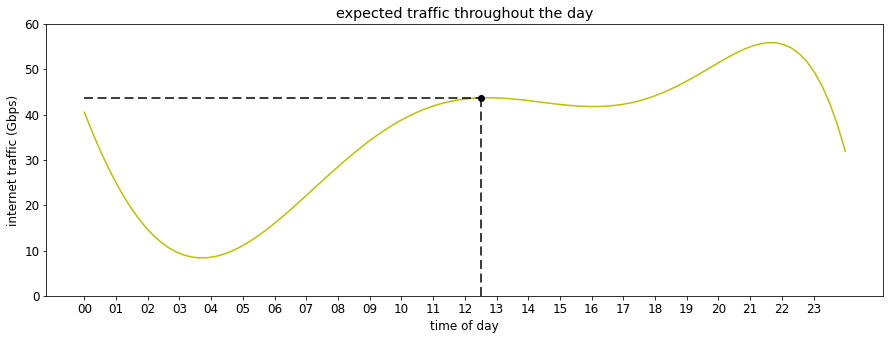

In [10]:
# Representa el tiempo 12:30
time = 12.5
###

pred = np.polyval(poly_6, time)
###

print("at t=%s, predicted internet traffic is %s Gbps"%(time,pred))

# Now let's visualise it
graph.plot(xp, np.polyval(poly_6, xp), 'y-')

graph.plot(time, pred, 'ko') # result point
graph.plot(np.linspace(0, time, 2), np.full([2], pred), dashes=[6, 3], color='black') # dashed lines (to y-axis)
graph.plot(np.full([2], time), np.linspace(0, pred, 2), dashes=[6, 3], color='black') # dashed lines (to x-axis)

graph.xticks(train_X, dataset.columns.values)
graph.ylim(0, 60)
graph.title('expected traffic throughout the day')
graph.xlabel('time of day')
graph.ylabel('internet traffic (Gbps)')

graph.show()